## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data_set = 'https://github.com/arghajit29/DS0522/raw/main/Data%20Science/Projects/happiness_score_dataset.csv'

data = pd.read_csv(data_set)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Statistical analysis

In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data_new = data.drop(['Country','Region','Happiness Rank'],axis=1)
data_new.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Initial visualization of the data

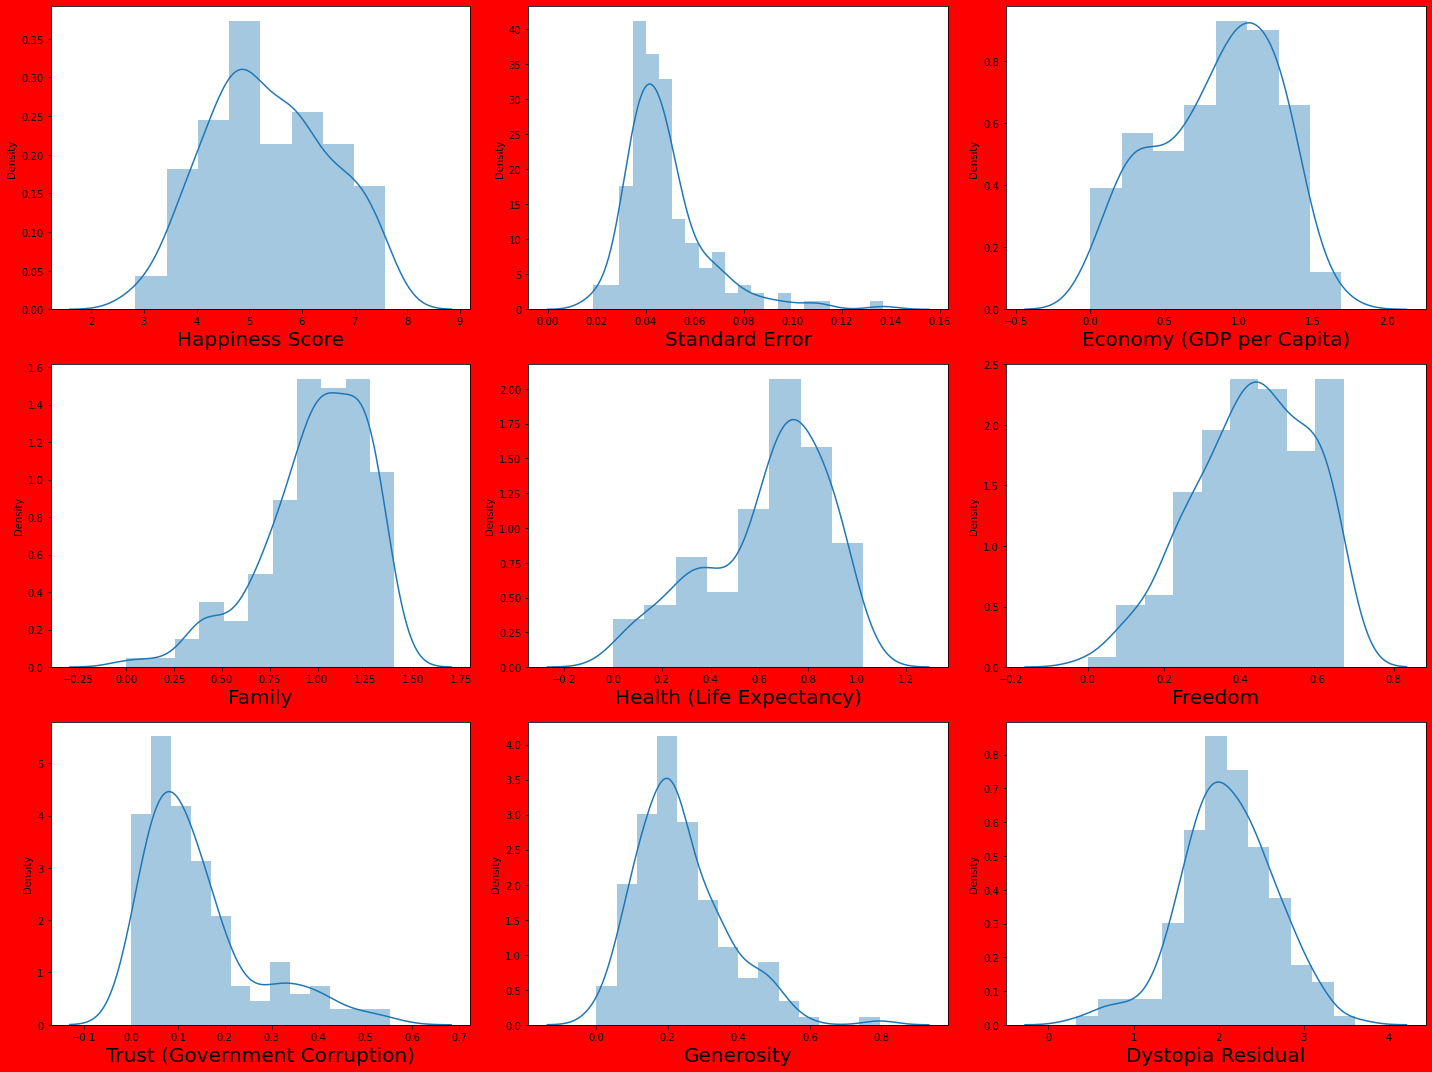

In [6]:
plt.figure(figsize=(20,15), facecolor = 'red')
plotnumber = 1

for column in data_new:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.tight_layout()

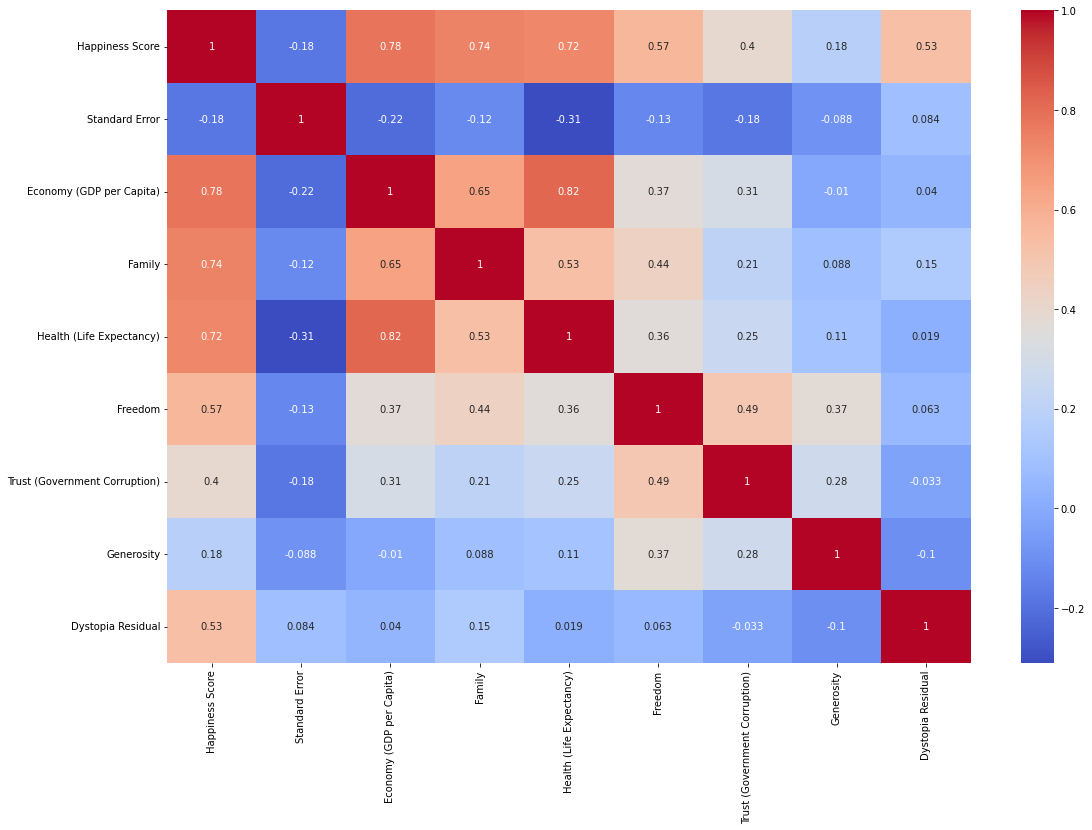

In [7]:
data_corr = data_new.corr()

plt.figure(figsize = (18,12))
sns.heatmap(data_corr, annot=True, cmap='coolwarm')
plt.show()

## Data normalization

In [8]:
data_new.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [9]:
data_new.corr()['Happiness Score']

Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [10]:
new_data = data_new.drop(['Standard Error', 'Family'],axis=1)
new_data

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
from scipy.stats import zscore

z = np.abs(zscore(new_data))
z.shape

(158, 7)

In [12]:
threshold = 3
print(np.where(z>3))

(array([ 27, 128, 153, 155], dtype=int64), array([4, 5, 4, 6], dtype=int64))


In [13]:
len(np.where(z>3)[0])

4

In [14]:
df_new = new_data[(z<3).all(axis=1)]
print('Old Dataframe', new_data.shape)
print('New Dataframe', df_new.shape)
print('Total dropped rows :', new_data.shape[0] - df_new.shape[0])

Old Dataframe (158, 7)
New Dataframe (154, 7)
Total dropped rows : 4


## Splitting dataset into Features and Labels

In [15]:
y = df_new['Happiness Score']
X = df_new.drop(['Happiness Score'],axis=1)

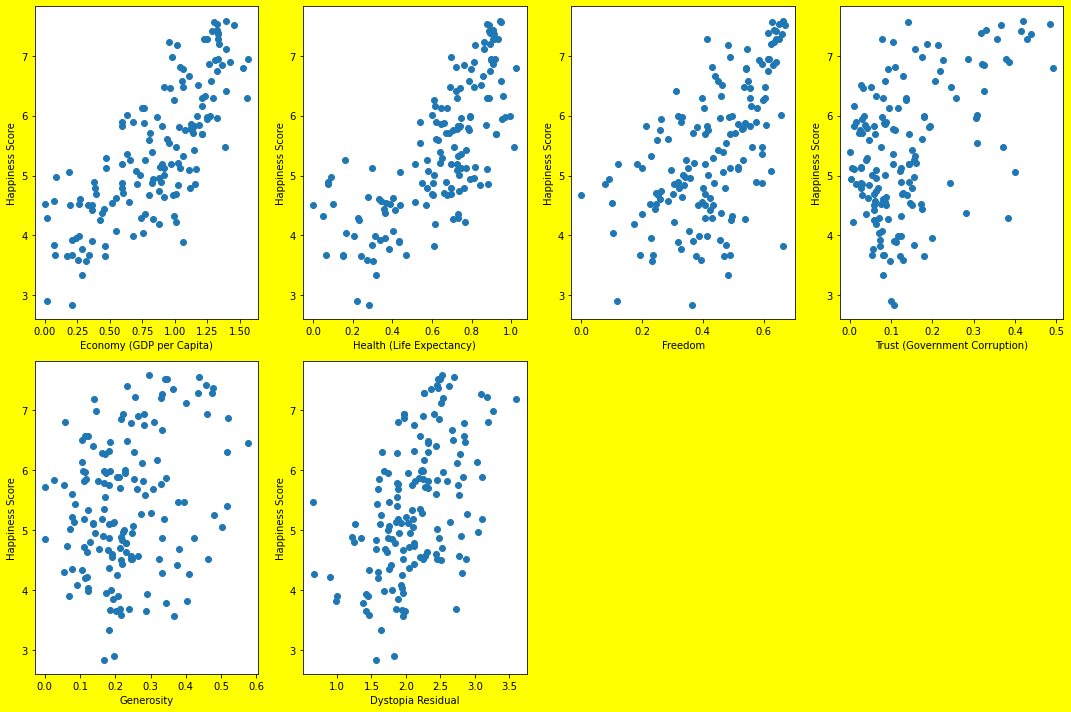

In [16]:
plt.figure(figsize=(15,10), facecolor = 'yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score',fontsize=10)
    plotnumber += 1
plt.tight_layout()

## Scaling data using power_transform

In [17]:
from sklearn.preprocessing import power_transform

X = power_transform(X, method='yeo-johnson')
X

array([[ 1.49408939e+00,  1.47901574e+00,  1.77265937e+00,
         1.82926536e+00,  6.62443448e-01,  7.43094721e-01],
       [ 1.20241822e+00,  1.51949190e+00,  1.45557749e+00,
         3.62884529e-01,  1.58068757e+00,  1.10203246e+00],
       [ 1.27335767e+00,  1.07371440e+00,  1.63178392e+00,
         1.96036931e+00,  9.85095103e-01,  6.93973276e-01],
       [ 1.69220585e+00,  1.13588113e+00,  1.80920807e+00,
         1.68044638e+00,  1.02350730e+00,  6.42195181e-01],
       [ 1.27584793e+00,  1.25806878e+00,  1.49120237e+00,
         1.56038430e+00,  1.70248946e+00,  6.15962703e-01],
       [ 1.16564969e+00,  1.15900439e+00,  1.56562903e+00,
         1.81465448e+00,  1.48088527e-01,  9.41500403e-01],
       [ 1.28553817e+00,  1.18121369e+00,  1.34614177e+00,
         1.51689193e+00,  1.79920469e+00,  6.42950361e-01],
       [ 1.29252713e+00,  1.28987043e+00,  1.72220342e+00,
         1.87171595e+00,  1.12840047e+00,  4.60190735e-01],
       [ 1.04458140e+00,  1.27467502e+00,  1.545

In [18]:
pd.DataFrame(X).skew().sort_values()

1   -0.188406
0   -0.147258
2   -0.075671
5    0.011950
4    0.021251
3    0.177409
dtype: float64

## Defining a class to avoid iteration of same steps

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy Score :', model.score(x_test,y_test) * 100, '%')
    y_pred = model.predict(x_test)
    print('Mean Absolute Error :', mean_absolute_error(y_test, y_pred) * 100, '%')
    print('Mean Squared Error :', mean_squared_error(y_test, y_pred) * 100, '%')
    print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)) * 100, '%')
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Happiness Score')
    plt.ylabel('Predicted Happiness Score')
    plt.title('Actual Vs Model Predicted')
    plt.show()

## Results as per Regression Models

Accuracy Score : 96.49374230559098 %
Mean Absolute Error : 17.24721993662438 %
Mean Squared Error : 4.482590889540497 %
Root Mean Squared Error : 21.1721300051282 %


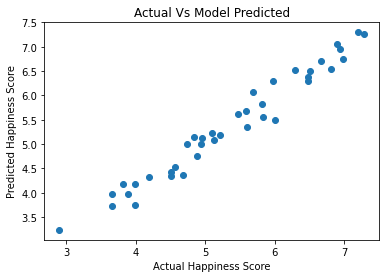

In [20]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
classify(lin, X, y)

Accuracy Score : 84.2963962037089 %
Mean Absolute Error : 34.393846153846155 %
Mean Squared Error : 20.076342769230767 %
Root Mean Squared Error : 44.80663206404914 %


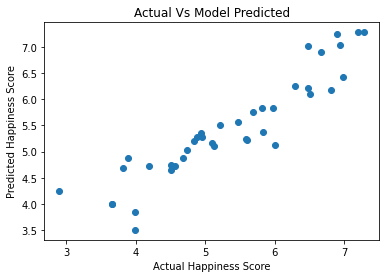

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
classify(knn, X, y)

Accuracy Score : 75.00200215550572 %
Mean Absolute Error : 45.67948717948718 %
Mean Squared Error : 31.958802564102573 %
Root Mean Squared Error : 56.53211703456945 %


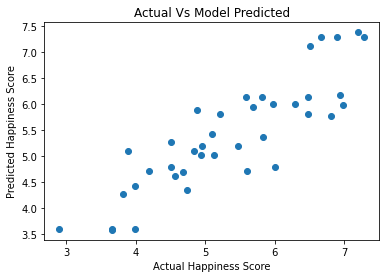

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
classify(dtr, X, y)

Accuracy Score : 88.951649114789 %
Mean Absolute Error : 28.849153846153868 %
Mean Squared Error : 14.124813786923088 %
Root Mean Squared Error : 37.58299321092333 %


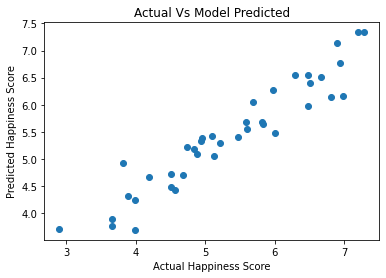

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
classify(rfr, X, y)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy Score : 96.49268794221719 %
Mean Absolute Error : 17.250380174911278 %
Mean Squared Error : 4.483938845128934 %
Root Mean Squared Error : 21.175313091260147 %


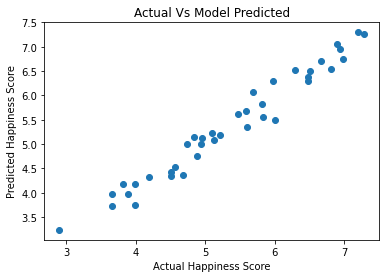

In [25]:
from sklearn.linear_model import Lasso, LassoCV

lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)
lasscv.fit(x_train, y_train)
alpha = lasscv.alpha_
lreg = Lasso(alpha)

classify(lreg, X, y)

Accuracy Score : 96.4937166826858 %
Mean Absolute Error : 17.247228853810473 %
Mean Squared Error : 4.482623647258656 %
Root Mean Squared Error : 21.17220736545591 %


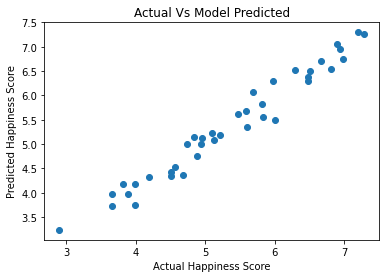

In [26]:
from sklearn.linear_model import Ridge, RidgeCV

ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.01), normalize = True)
ridgecv.fit(x_train, y_train)
alpha1 = ridgecv.alpha_
rreg = Ridge(alpha1)

classify(rreg, X, y)